In [1]:
# 必要なライブラリーのインポート
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

import graphviz
import lingam
from lingam.utils import make_dot

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(100)

['1.18.1', '1.0.1', '0.16', '1.5.2']


## 効用関数（Utility function）

In [2]:
def make_graph(adjacency_matrix, labels=None):
    idx = np.abs(adjacency_matrix) > 0.5
    dirs = np.where(idx)
    d = graphviz.Digraph(format='png', engine='dot')
    # フォント設定
    d.attr('node', fontname="MS Gothic", fontsize="10")
    names = labels if labels else [f'x{i}' for i in range(len(adjacency_matrix))]
    for to, from_, coef in zip(dirs[0], dirs[1], adjacency_matrix[idx]):
        d.edge(names[from_], names[to], label=f'{coef:.2f}', fontsize="10")
    return d

In [3]:
# データセットの読込み
boston = load_boston()

# データフレームの作成
# 説明変数の格納
df = pd.DataFrame(boston.data, columns = boston.feature_names)

# 目的変数の追加
df['MEDV'] = boston.target

# データの中身を確認
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 統計的因果探索（LiNGAM）

In [4]:
model = lingam.DirectLiNGAM()
model.fit(df)

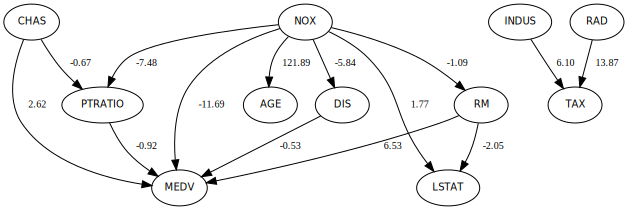

In [5]:
labels = [f'{col}' for i, col in enumerate(df.columns)]
make_graph(model.adjacency_matrix_, labels)

In [6]:
p_values = model.get_error_independence_p_values(df)
print(p_values)

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[[0.    0.    0.      nan 0.    0.001 0.    0.    0.    0.    0.    0.
  0.    0.009]
 [0.    0.    0.      nan 0.    0.334 0.001 0.    0.    0.    0.    0.
  0.    0.063]
 [0.    0.    0.      nan 0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.   ]
 [  nan   nan   nan 0.      nan   nan   nan   nan   nan   nan   nan   nan
    nan   nan]
 [0.    0.    0.      nan 0.    0.002 0.    0.    0.    0.    0.    0.
  0.    0.   ]
 [0.001 0.334 0.      nan 0.002 0.    0.    0.035 0.    0.056 0.    0.048
  0.    0.   ]
 [0.    0.001 0.      nan 0.    0.    0.    0.    0.    0.    0.    0.65
  0.001 0.   ]
 [0.    0.    0.      nan 0.    0.035 0.    0.    0.    0.    0.    0.
  0.058 0.   ]
 [0.    0.    0.      nan 0.    0.    0.    0.    0.    0.    0.    0.
  0.098 0.   ]
 [0.    0.    0.      nan 0.    0.056 0.    0.    0.    0.    0.    0.
  0.    0.   ]
 [0.    0.    0.      nan 0.    0.    0.    0.    0.    0.    0.    0.
  0.291 0.   ]
 [0.    0.    0.      nan 0.    0.048 0.65  0.

In [7]:
#graph = make_graph(model.adjacency_matrix_, labels)

In [8]:
# cleanup=True を指定してDOT言語ファイルを削除
#graph.render('graph', format='png', cleanup=True)